In [8]:
import pandas as pd 
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [9]:
titanic=pd.read_csv("C:/Users/91994/Downloads/Titanic/train.csv")

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


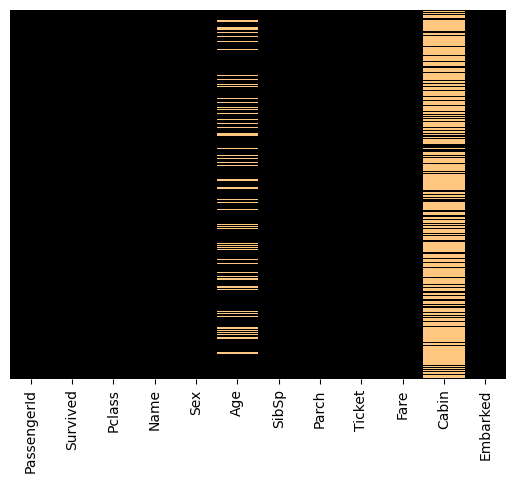

In [18]:
snb.heatmap(titanic.isnull(), cbar=False, yticklabels=False, cmap="copper")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

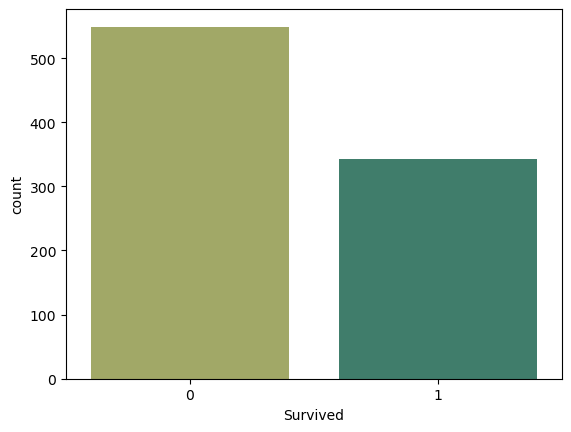

In [16]:
snb.countplot(x="Survived", data=titanic, palette="gist_earth_r")

<Axes: xlabel='Survived', ylabel='count'>

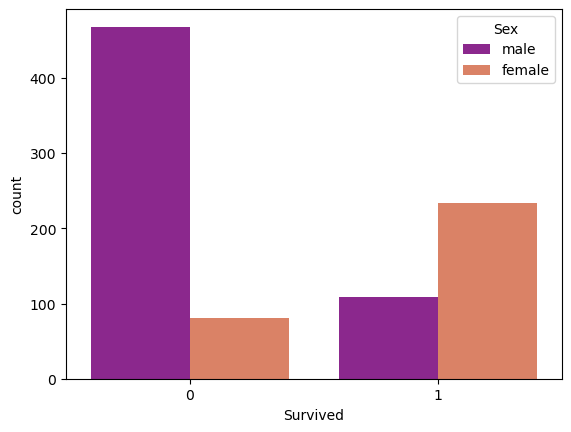

In [21]:
snb.countplot(x="Survived", hue="Sex", data=titanic, palette="plasma") #from here analysing data 

<Axes: xlabel='Survived', ylabel='count'>

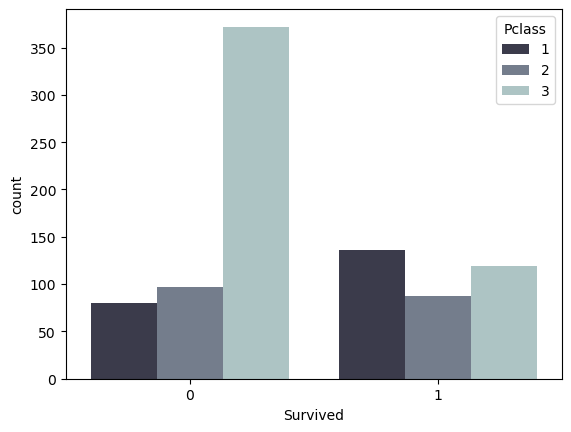

In [22]:
snb.countplot(x="Survived", hue="Pclass", data=titanic, palette="bone")

<Axes: ylabel='Frequency'>

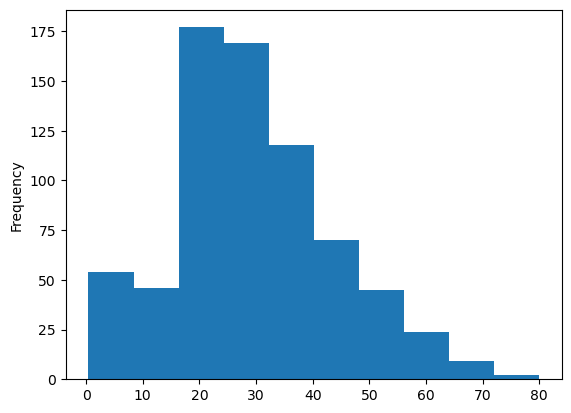

In [23]:
titanic["Age"].plot.hist()

<Axes: ylabel='Frequency'>

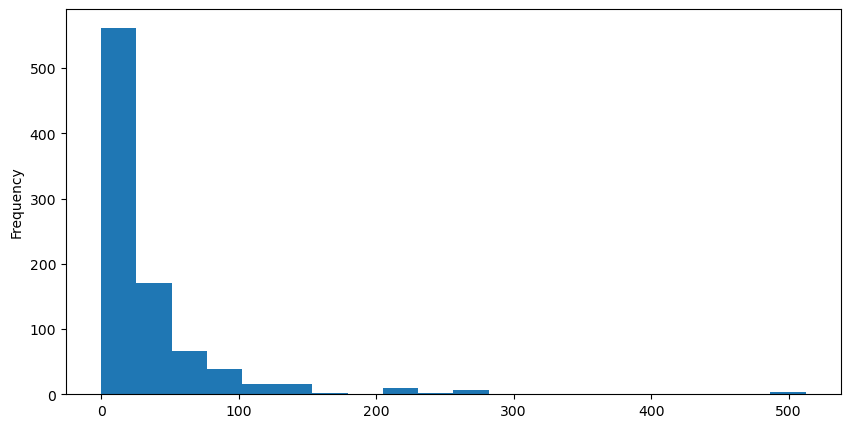

In [24]:
titanic["Fare"].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

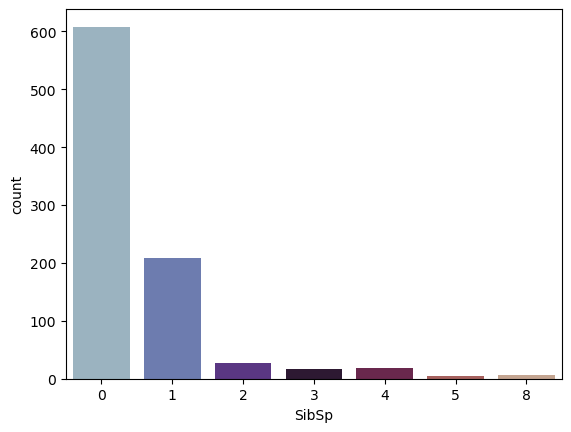

In [26]:
snb.countplot(x="SibSp", data=titanic, palette="twilight")

<Axes: xlabel='Parch', ylabel='count'>

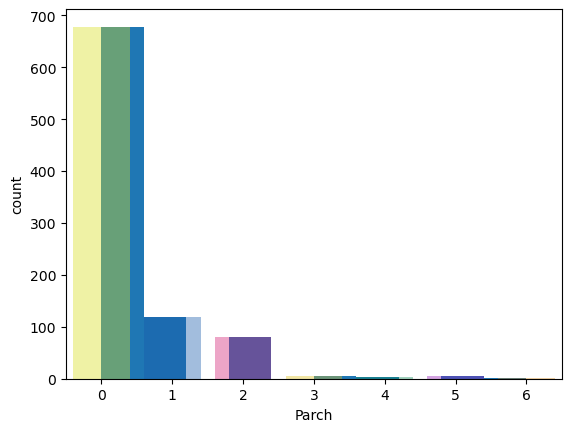

In [33]:
titanic["Parch"].plot.hist() 
snb.countplot(x="Parch", data=titanic, palette='prism', alpha=0.4)

In [55]:
 #from here data wrangling i.e cleaning data, remove null values, drop and add columns if needed
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

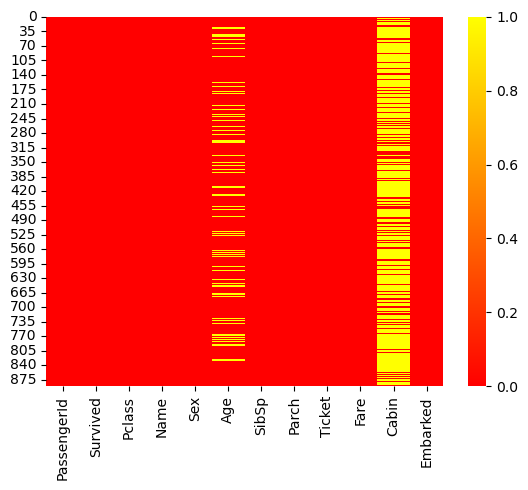

In [38]:
snb.heatmap(titanic.isnull(), cmap="autumn") #yellow color represents null value

<Axes: xlabel='Pclass', ylabel='Age'>

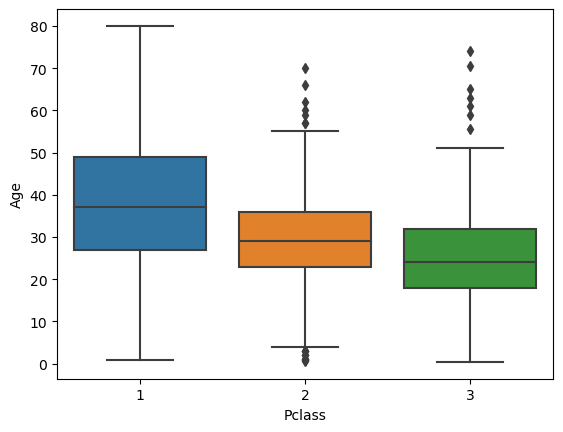

In [40]:
snb.boxplot(x="Pclass", y="Age", data=titanic)

In [41]:
titanic.drop("Cabin", axis=1, inplace=True)

In [42]:
titanic.dropna(inplace=True)

In [43]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


<Axes: >

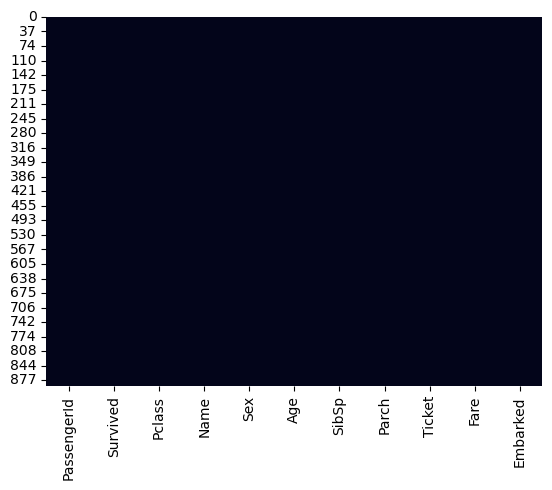

In [44]:
snb.heatmap(titanic.isnull(),cbar=False) #no null values is found

In [45]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [46]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [47]:
pd.get_dummies(titanic["Sex"]).head() #1 is male, 0 is female 

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [48]:
#training the data 
from sklearn.preprocessing import LabelEncoder 
labelencoder=LabelEncoder()
titanic['Sex']=labelencoder.fit_transform(titanic['Sex'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [49]:
x=titanic[['Pclass','Sex']]
y=titanic['Survived']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=4)

In [53]:
titanic["Sex"], titanic["Survived"]

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 885    0
 886    1
 887    0
 889    1
 890    1
 Name: Sex, Length: 712, dtype: int32,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 712, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

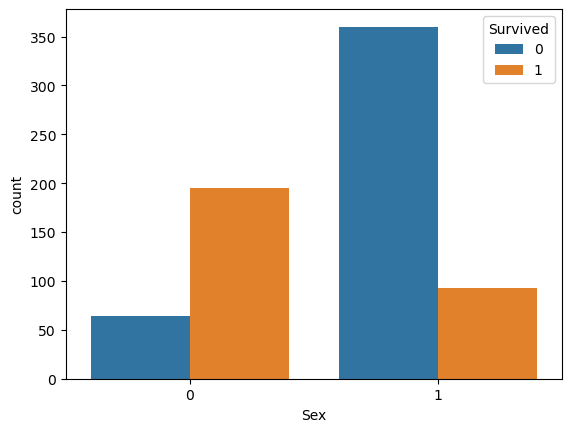

In [52]:
snb.countplot(x=titanic['Sex'], hue=titanic['Survived'])

In [54]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [56]:
# from here Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)

In [58]:
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [59]:
prediction=model.predict(x_test)

In [61]:
from sklearn.metrics import classification_report

In [62]:
prediction

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[113,  19],
       [ 30,  52]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.7710280373831776

In [68]:
import warnings 
warnings.filterwarnings('ignore')
res=model.predict([[3,0]])
if res==0:
    print("The passenger is died")
else:
    print("The passenger is survived")

The passenger is survived
